## Telecom Chrun Group  - Case Study

The main goal of the case study is to build ML models to predict churn, generated model/summary will be used for following:
- To predict whether a high-value customer will churn or not, in near future.
- It will be used to identify important variables that are strong predictors of churn.
- These variables may also indicate why customers choose to switch to other networks
- Recommend strategies to manage customer churn based on your observations

### Steps followed:
* Data Cleaning
* Feature Analysis
* Correlation analysis
* Build models for prediction 
* Summary

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom_df = pd.read_csv("train.csv")

In [3]:
telecom_df.shape

(69999, 172)

In [4]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [5]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Data Cleaning

On analysing data in Excel, we have many columns which are either of following types:
* Columns containing many null values
* Columns with very low variance in data; ie columns with similar values

Such columns will not help in the analysis and can be deleted.

In [6]:
100 * telecom_df.isna().sum()/len(telecom_df)

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

### Remove columns with missing values:
* Check percentage of null/missing values
* Any columns with null/missing value more than 25% will be deleted.

In [7]:
missing_df = (telecom_df.isnull().sum() / telecom_df.isnull().count()*100).sort_values(ascending = False)
missing_df = missing_df.to_frame()
missing_df = missing_df.rename(columns={0: 'value'})
missing_df.head()

,value
arpu_3g_6,74.902499
count_rech_2g_6,74.902499
night_pck_user_6,74.902499
arpu_2g_6,74.902499
date_of_last_rech_data_6,74.902499


In [8]:
percent_missing = telecom_df.isnull().sum() * 100 / len(telecom_df)
missing_value_df = pd.DataFrame({'column_name': telecom_df.columns,
                                 'percent_missing': percent_missing}
                               )
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df.head()

,column_name,percent_missing
arpu_3g_6,arpu_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
arpu_2g_6,arpu_2g_6,74.902499
date_of_last_rech_data_6,date_of_last_rech_data_6,74.902499


In [9]:
# Deleting columns with more than 30% of missing value.
# as discussed in the Case Study meeting, using 30% rather than previously 20/25%.
missing_value_threshhold = 30
missing_col_list = list(missing_value_df.index[missing_value_df['percent_missing'] > missing_value_threshhold])
missing_col_list

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [10]:
telecom_df.drop(missing_col_list, axis=1, inplace=True)
telecom_df.shape

(69999, 142)

In [11]:
telecom_df.dropna(axis=1, how="all", inplace=True)
telecom_df.shape

(69999, 142)

In [12]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


### Ananlyse column data with very low varaince in values present in column
* Columns which has only 1-2 values.
* Such columns will not help in final model building.

In [13]:
telecom_df.columns[telecom_df.nunique() <= 1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [14]:
telecom_df.nunique()

id                   69999
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
                     ...  
aon                   3455
aug_vbc_3g           10609
jul_vbc_3g           10257
jun_vbc_3g            9617
churn_probability        2
Length: 142, dtype: int64

In [15]:
percent_unique = telecom_df.nunique() * 100 / len(telecom_df)
unique_value_df = pd.DataFrame({'column_name': telecom_df.columns,
                                 'percent_unique': percent_unique}
                               )
unique_value_df.sort_values('percent_unique', inplace=True)
unique_value_df.head(20)

,column_name,percent_unique
std_ic_t2o_mou_7,std_ic_t2o_mou_7,0.001429
circle_id,circle_id,0.001429
loc_og_t2o_mou,loc_og_t2o_mou,0.001429
std_og_t2o_mou,std_og_t2o_mou,0.001429
loc_ic_t2o_mou,loc_ic_t2o_mou,0.001429
last_date_of_month_6,last_date_of_month_6,0.001429
last_date_of_month_7,last_date_of_month_7,0.001429
last_date_of_month_8,last_date_of_month_8,0.001429
std_og_t2c_mou_7,std_og_t2c_mou_7,0.001429
std_ic_t2o_mou_8,std_ic_t2o_mou_8,0.001429


In [16]:
unique_col_list = list(unique_value_df.index[unique_value_df['percent_unique'] <= 2])
unique_col_list.remove('churn_probability')
unique_col_list

['std_ic_t2o_mou_7',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_6',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_6',
 'monthly_2g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_6',
 'monthly_3g_8',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'date_of_last_rech_6',
 'sachet_2g_6',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'sachet_2g_8',
 'sachet_2g_7',
 'spl_ic_mou_6',
 'total_rech_num_8',
 'total_rech_num_6',
 'spl_ic_mou_8',
 'total_rech_num_7',
 'spl_ic_mou_7',
 'og_others_7',
 'last_day_rch_amt_7',
 'max_rech_amt_7',
 'og_others_8',
 'last_day_rch_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'og_others_6',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6']

In [17]:
telecom_df.drop(unique_col_list, axis=1, inplace=True)
telecom_df.shape

(69999, 96)

### Feature Analysis
* Plots to analysis relation between final variable and feature

In [18]:
telecom_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0.00,0.00,0.0,0.00,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,352.91,0.00,0.0,3.96,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0.00,0.00,0.0,0.00,0.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0.00,0.00,0.0,0.00,0.0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,308.89,213.47,0.0,0.00,0.0,647,0.0,0.0,0.0,0


In [19]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 96 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 69999 non-null  int64  
 1   arpu_6             69999 non-null  float64
 2   arpu_7             69999 non-null  float64
 3   arpu_8             69999 non-null  float64
 4   onnet_mou_6        67231 non-null  float64
 5   onnet_mou_7        67312 non-null  float64
 6   onnet_mou_8        66296 non-null  float64
 7   offnet_mou_6       67231 non-null  float64
 8   offnet_mou_7       67312 non-null  float64
 9   offnet_mou_8       66296 non-null  float64
 10  roam_ic_mou_6      67231 non-null  float64
 11  roam_ic_mou_7      67312 non-null  float64
 12  roam_ic_mou_8      66296 non-null  float64
 13  roam_og_mou_6      67231 non-null  float64
 14  roam_og_mou_7      67312 non-null  float64
 15  roam_og_mou_8      66296 non-null  float64
 16  loc_og_t2t_mou_6   672

In [20]:
# Util method to fill columns values
# If column type is Number, use Median
# If column type is String, use Mode
def fill_missing_values(df):    
    column_list = df.isnull().sum()
    column_list = column_list[column_list > 0]

    for col in column_list.index:
        column_dtype_name = df[col].dtype.name
        if column_dtype_name == 'object':
            # Categorical Columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif column_dtype_name == 'float64' or column_dtype_name == 'int64' or column_dtype_name == 'int32':
            # Numerical Columns
            df[col] = df[col].fillna((df[col].median()))
        else:
            print('Unknown column type for: {}'.format(col))
            
    return df

In [21]:
telecom_df = fill_missing_values(telecom_df)

#### We have class imbalance:
* non-chrum class has 62867 rows
* chrun class has 7123 rows

Apply SMOTE to balance the classes in the data set

In [22]:
### Check Class imbalance
chrun_len = len(telecom_df[telecom_df['churn_probability'] == 1])
non_chrun_len = len(telecom_df[telecom_df['churn_probability'] == 0])

print("Original non-chrun/Chrun diff: {}".format(abs(chrun_len - non_chrun_len)))

Original non-chrun/Chrun diff: 55735


In [23]:
y = telecom_df.pop('churn_probability')
X = telecom_df

In [24]:
sm = SMOTE(random_state=27)
X_res, y_res = sm.fit_resample(X, y)

In [25]:
telecom_df = pd.concat([X_res.reset_index(drop=True), 
                        y_res.to_frame().reset_index(drop=True)], axis=1)

In [26]:
chrun_len = len(telecom_df[telecom_df['churn_probability'] == 1])
non_chrun_len = len(telecom_df[telecom_df['churn_probability'] == 0])

print("Updated non-chrun/Chrun diff: {}".format(abs(chrun_len - non_chrun_len)))

Updated non-chrun/Chrun diff: 0


### Visual Analysis

##### Outlier detection plots are not included in this notebook as they were not very helpful.

In [27]:
def draw_scatterplot(df, xAxis, yAxis):
    '''
    Util method to plot barplot
    input: X and Y axis column name
    output: Plot
    return: None
    '''
    plt.figure(figsize=(20,10))
    plt.ylabel(yAxis,fontsize=14,color='w')
    plt.xlabel(xAxis,fontsize=14,color = 'w')      
    plt.title("Barplot: {0} vs {1}".format(xAxis, yAxis),fontsize=14)
    sbn.scatterplot(data=df, x=xAxis, y=yAxis, orient='v')
    plt.show()

### Derived features for analysis

#### Deriving average columns

In [28]:
telecom_df['avg_arpu_action'] = (telecom_df['arpu_6'] + telecom_df['arpu_7'] + telecom_df['arpu_8'])/3
telecom_df['avg_total_ic_mou'] = (telecom_df['total_ic_mou_6'] + telecom_df['total_ic_mou_7'] + telecom_df['total_ic_mou_8'])/3
telecom_df['avg_std_ic_mou'] = (telecom_df['std_ic_mou_6'] + telecom_df['std_ic_mou_7'] + telecom_df['std_ic_mou_8'])/3
telecom_df['avg_std_og_mou'] = (telecom_df['std_og_mou_6'] + telecom_df['std_og_mou_7'] + telecom_df['std_og_mou_8'])/3
telecom_df['avg_vol_2g_mb'] = (telecom_df['vol_2g_mb_6'] + telecom_df['vol_2g_mb_7'] + telecom_df['vol_2g_mb_8'])/3
telecom_df['avg_vol_3g_mb'] = (telecom_df['vol_3g_mb_6'] + telecom_df['vol_3g_mb_7'] + telecom_df['vol_3g_mb_8'])/3
telecom_df['avg_vbc_3g'] = (telecom_df['aug_vbc_3g'] + telecom_df['jul_vbc_3g'] + telecom_df['jun_vbc_3g'])/3
telecom_df['avg_total_rech_amt'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'] + telecom_df['total_rech_amt_8'])/3
telecom_df['avg_total_og_mou'] = (telecom_df['total_og_mou_6'] + telecom_df['total_og_mou_7'] + telecom_df['total_og_mou_8'])/3

telecom_df['avg_offnet_mou'] = (telecom_df['offnet_mou_6'] + telecom_df['offnet_mou_7'] + telecom_df['offnet_mou_8'])/3
telecom_df['avg_onnet_mou'] = (telecom_df['onnet_mou_6'] + telecom_df['onnet_mou_7'] + telecom_df['onnet_mou_8'])/3
telecom_df['avg_roam_ic_mou'] = (telecom_df['roam_ic_mou_6'] + telecom_df['roam_ic_mou_7'] + telecom_df['roam_ic_mou_8'])/3
telecom_df['avg_roam_ic_mou'] = (telecom_df['roam_og_mou_6'] + telecom_df['roam_og_mou_7'] + telecom_df['roam_og_mou_8'])/3
telecom_df['avg_spl_og_mou'] = (telecom_df['spl_og_mou_6'] + telecom_df['spl_og_mou_7'] + telecom_df['spl_og_mou_8'])/3

#### Deriving difference columns

In [29]:
# Churn dataframe
telecom_churn = telecom_df[telecom_df['churn_probability'] == 1]

# Non-churn dataframe
telecom_non_churn = telecom_df[telecom_df['churn_probability'] == 0]

In [30]:
def dist_plot_compare(df_churn, df_non_churn, column_name):
    plt.figure(figsize=(12,8))
    ax = sns.distplot(df_churn[column_name], label='churn', hist=False)
    ax = sns.distplot(df_non_churn[column_name], label='not churn', hist=False)
    ax.set(xlabel=" ".join(column_name.split("_")))
    plt.legend()
    plt.show()

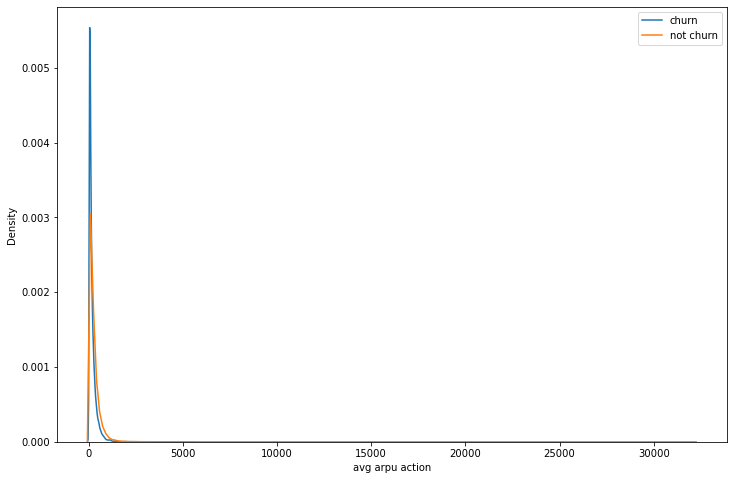

In [31]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_arpu_action')

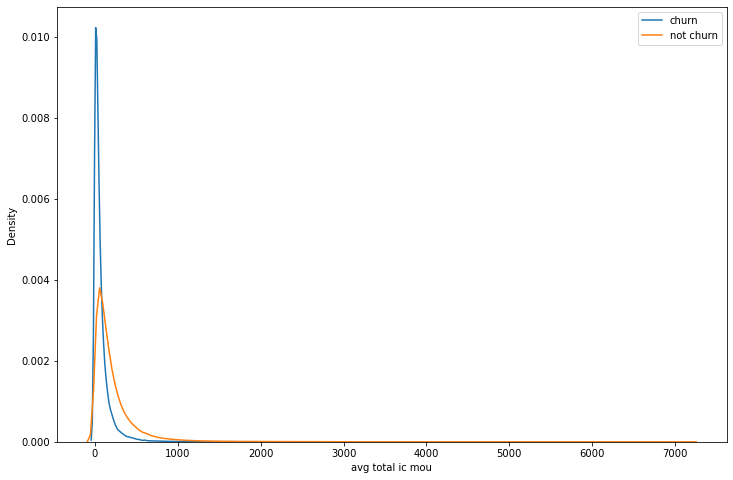

In [32]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_total_ic_mou')

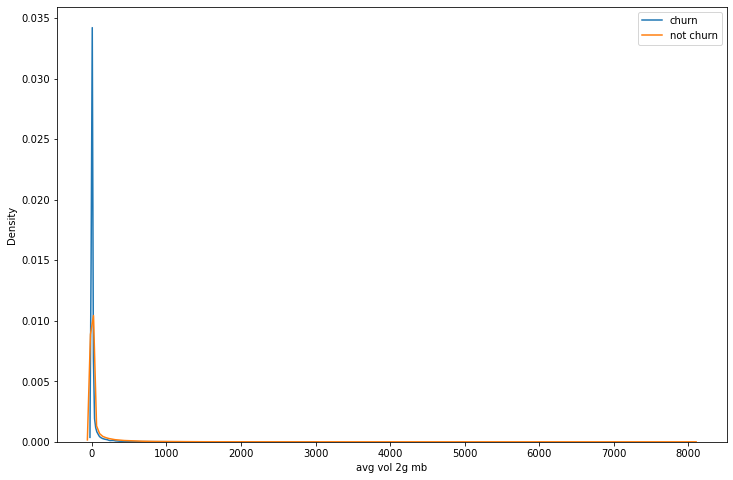

In [33]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_vol_2g_mb')

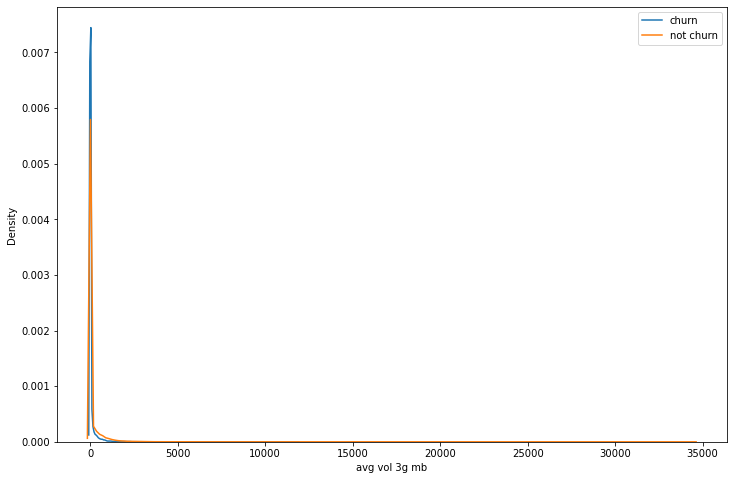

In [34]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_vol_3g_mb')

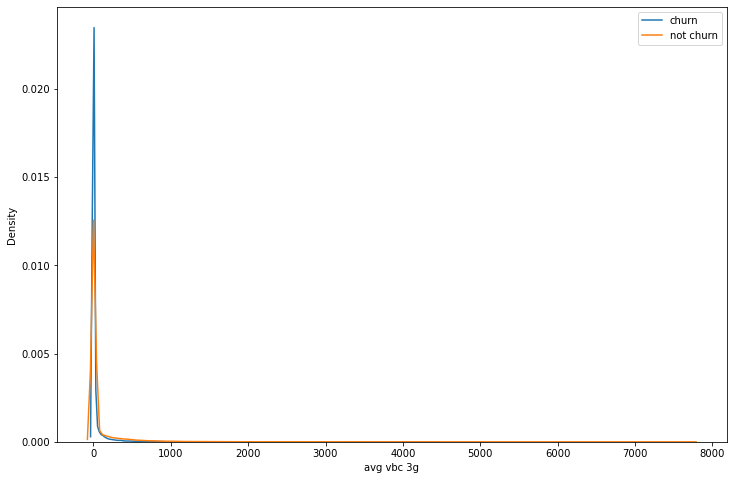

In [35]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_vbc_3g')

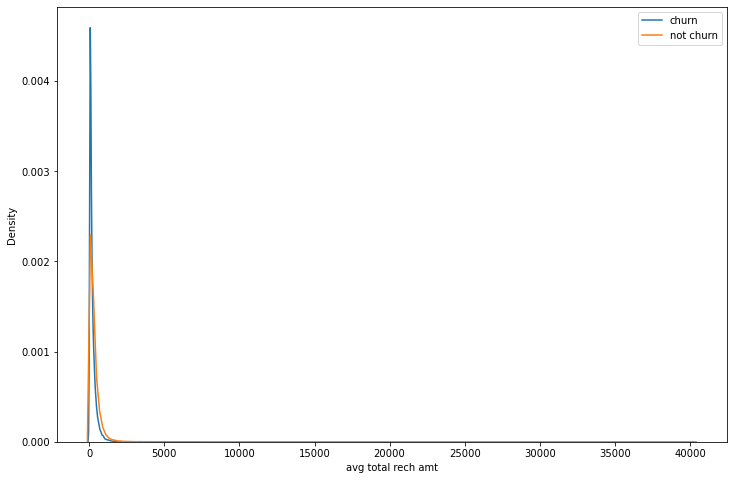

In [36]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_total_rech_amt')

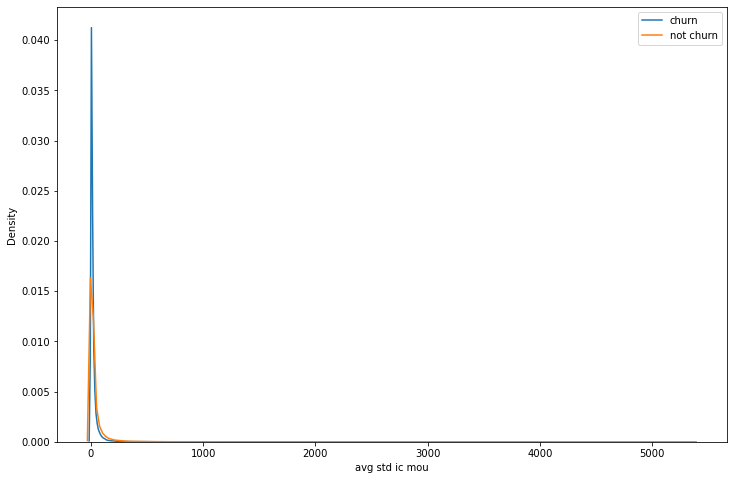

In [37]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_std_ic_mou')

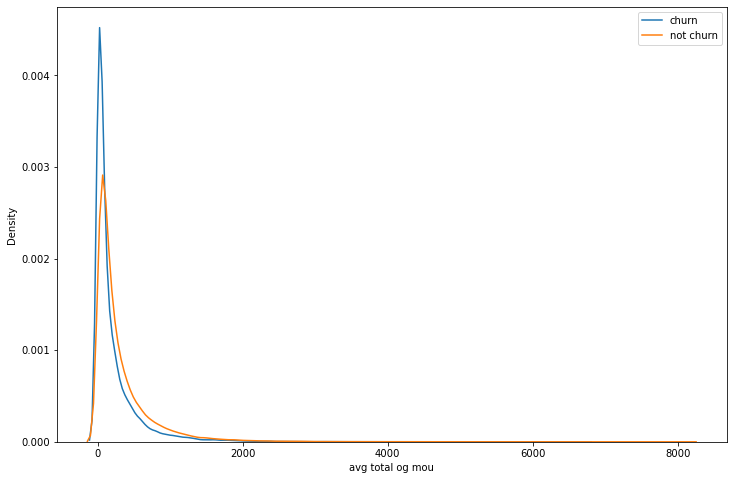

In [38]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_total_og_mou')

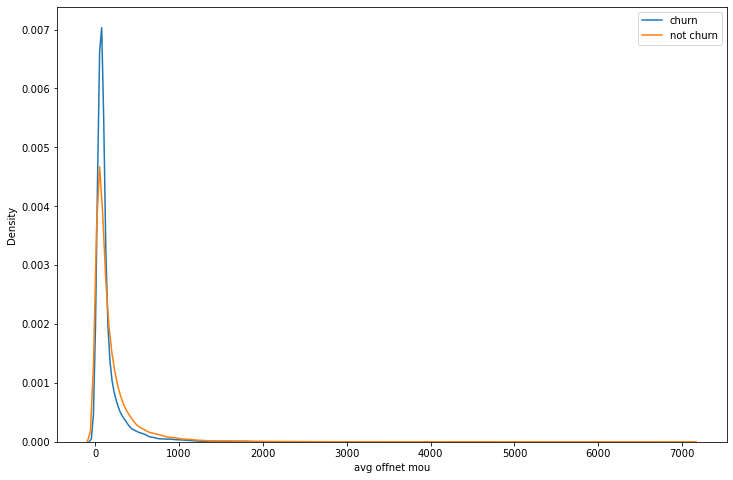

In [39]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_offnet_mou')

### Analysis for chrun case:

Following properties of customer are changes in last (8th month) when compared with avarage of 6th and 7th month:
* Customer generating high revenue.
* Customer spending more on Recharge amount.
* Customer with high number of incoming STD call.
* Customer making high number of calls to external network call.
* Customer with more number of outgoing call
* Customer using 2G compared to 3G

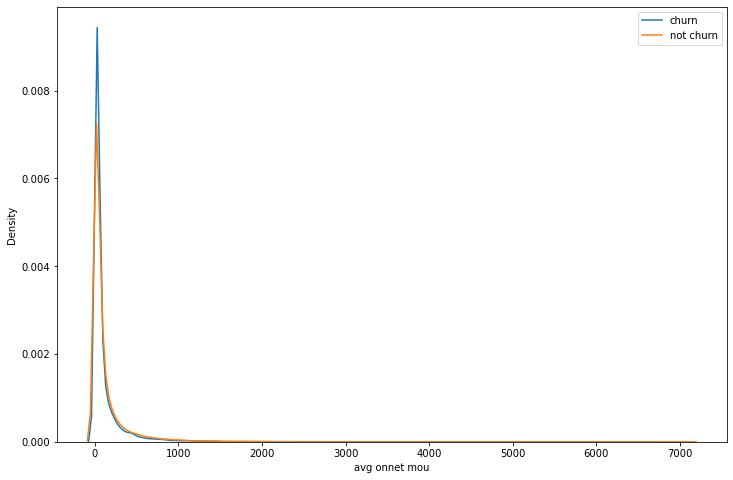

In [40]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_onnet_mou')

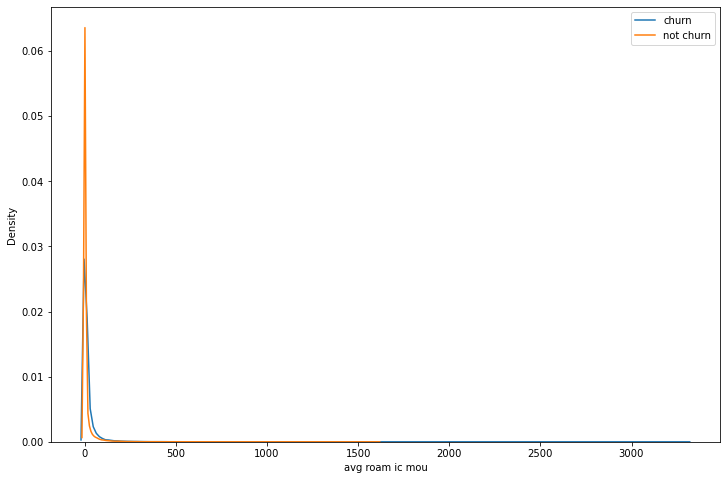

In [41]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_roam_ic_mou')

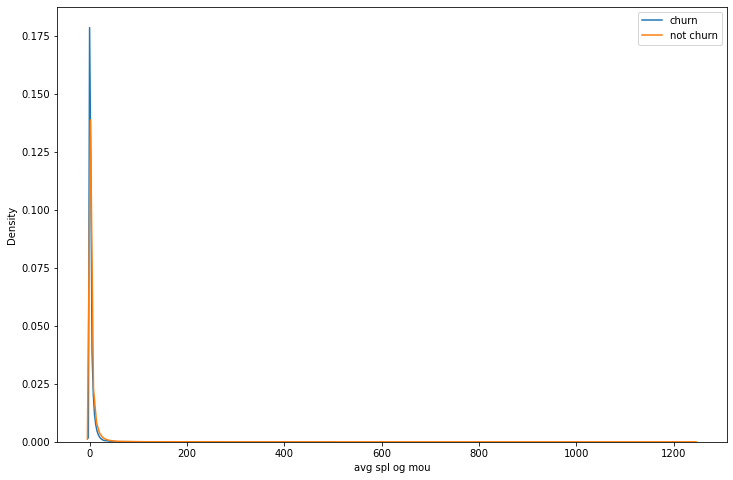

In [42]:
dist_plot_compare(telecom_churn, telecom_non_churn, 'avg_spl_og_mou')

### Analysis on non-chrun:
Customer with following properties are most likely to noot-chrun
* Customer calling between same network (onnet).
* Customer with more incoming calls in roaming.
* Customer with more special calls

In [43]:
# Time to delete, newly added avg columns, which were added for visual analysis.
new_avg_cols = [col for col in telecom_df.columns if "avg_" in col]
telecom_df.drop(new_avg_cols, axis=1, inplace=True)
telecom_df.shape

(125734, 96)

### Correlation analysis
We need to analyse the correlation metrics of various columns:
* Will give us idea about the co-related features
* Will help to decide if PCA can be applied or not.

In [44]:
telecom_df.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,-0.007153,0.007119,0.006518,-0.002695,0.001818,-0.001962,-0.011511,-0.007706,-0.004273,...,0.002329,0.007626,0.004599,0.002287,0.004755,0.009326,0.009069,0.002236,0.005137,-0.002174
arpu_6,-0.007153,1.000000,0.651631,0.498572,0.473986,0.327567,0.234888,0.604014,0.420906,0.300186,...,0.044533,0.029618,0.228604,0.162140,0.150433,0.018289,0.131180,0.155314,0.200876,0.003973
arpu_7,0.007119,0.651631,1.000000,0.725052,0.317078,0.473854,0.358177,0.419296,0.610548,0.450372,...,0.109222,0.073846,0.165468,0.261678,0.207423,0.053834,0.186168,0.218242,0.156479,-0.143778
arpu_8,0.006518,0.498572,0.725052,1.000000,0.187112,0.323070,0.462102,0.268767,0.428644,0.610058,...,0.081104,0.127747,0.150230,0.205846,0.284760,0.105069,0.241752,0.187976,0.148420,-0.330570
onnet_mou_6,-0.002695,0.473986,0.317078,0.187112,1.000000,0.709825,0.497806,0.174744,0.113072,0.078286,...,-0.023288,-0.024835,-0.008181,-0.009339,-0.007777,-0.047933,-0.015414,-0.018752,-0.018910,0.055241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aon,0.009326,0.018289,0.053834,0.105069,-0.047933,-0.024414,0.005201,-0.011616,0.009870,0.044366,...,-0.009257,0.001529,-0.003372,0.002116,0.014900,1.000000,0.032882,0.026291,0.018445,-0.252043
aug_vbc_3g,0.009069,0.131180,0.186168,0.241752,-0.015414,0.001334,0.019173,0.009139,0.026646,0.052294,...,0.124878,0.127135,0.361179,0.461574,0.613824,0.032882,1.000000,0.671006,0.513586,-0.141132
jul_vbc_3g,0.002236,0.155314,0.218242,0.187976,-0.018752,-0.003874,0.009781,0.010382,0.024244,0.038964,...,0.135637,0.113089,0.436076,0.641177,0.470327,0.026291,0.671006,1.000000,0.639515,-0.098509
jun_vbc_3g,0.005137,0.200876,0.156479,0.148420,-0.018910,-0.016851,0.000518,0.016502,0.011353,0.025567,...,0.086433,0.092300,0.626654,0.455831,0.405687,0.018445,0.513586,0.639515,1.000000,-0.065323


<AxesSubplot:>

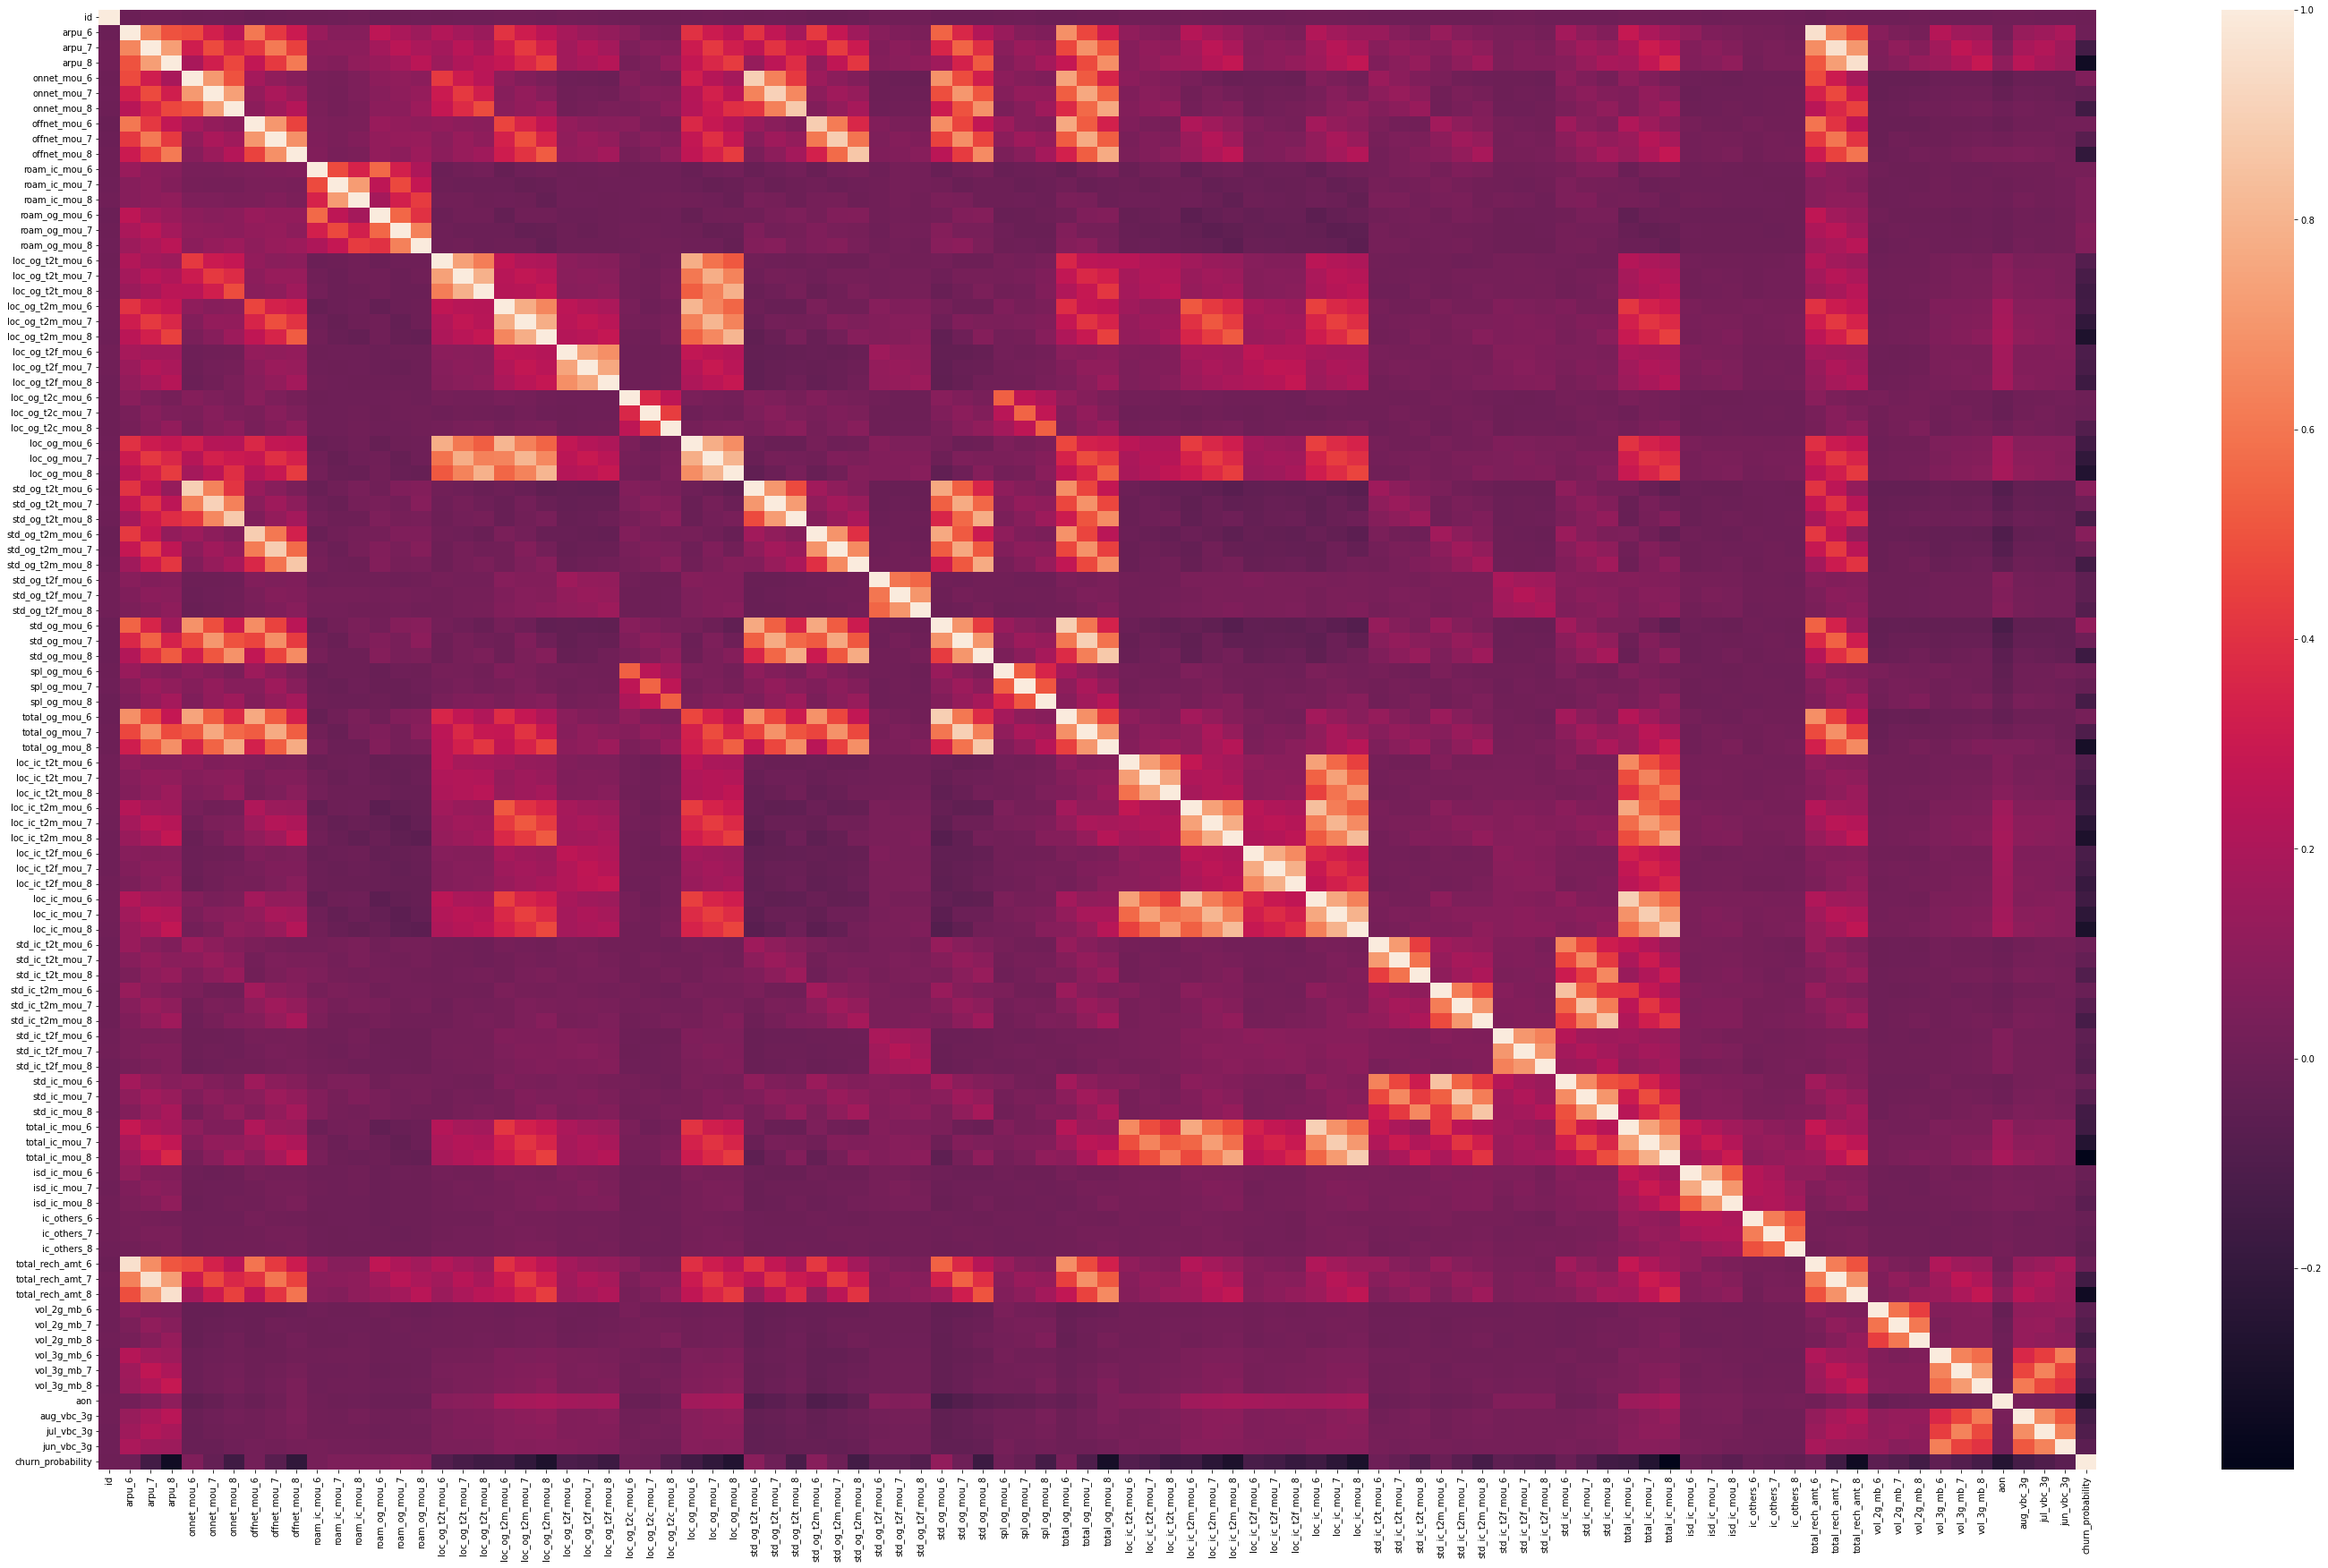

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,30))
sns.heatmap(telecom_df.corr(),annot = False)

In [46]:
telecom_df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_i

### Let's build model now, we will build following three models: 
* PCA followed by Linear Regression
* Random Forest
* PCA followed by Random Forest

Lets start with spliting the train data into Train and Test data

In [47]:
# Splitting the data into train and test
y = telecom_df.pop('churn_probability')
X = telecom_df

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

ID_X_train = X_train.pop('id')
ID_X_test = X_test.pop('id')

In [48]:
X_train.shape

(88013, 94)

In [49]:
ID_X_train.shape

(88013,)

### Scaling
* Before PCA is applied, we need to scale the features

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

#### Apply PCA
We have multiple columns which are co-related, PCA will help in following:
* Dimentionality reducing, hence model generation would be fast.
* Reduce correlation.

In [52]:
pca = PCA(random_state=42)

In [53]:
pca.fit(X_train_scaled)

PCA(random_state=42)

In [54]:
pca.components_

array([[ 1.63043652e-01,  1.87117089e-01,  1.75231783e-01, ...,
         4.37048109e-02,  4.24234353e-02,  3.64959172e-02],
       [-8.15611402e-02, -8.67370303e-02, -5.03738995e-02, ...,
         4.13500212e-02,  4.12333960e-02,  4.01631076e-02],
       [-2.67603912e-02, -2.66944635e-02, -2.54916427e-02, ...,
        -1.01759579e-02, -7.89305477e-03, -8.80097740e-03],
       ...,
       [ 7.96542737e-08,  1.14630969e-07, -1.79782557e-08, ...,
         2.49817884e-07,  2.17429200e-07,  1.04546463e-07],
       [-3.02768750e-07, -2.42010717e-07,  1.30093956e-07, ...,
        -7.26960017e-08,  6.02158079e-08,  7.64117664e-08],
       [-7.96020982e-08, -5.77805162e-09,  8.29243627e-08, ...,
         1.26267986e-08,  3.50148647e-08, -7.99281506e-08]])

In [55]:
pca.explained_variance_ratio_

array([1.58190154e-01, 9.45791280e-02, 5.53243570e-02, 4.57479271e-02,
       3.99203038e-02, 3.60724379e-02, 3.54565016e-02, 3.30054995e-02,
       3.11176378e-02, 2.85088938e-02, 2.83247119e-02, 2.57850734e-02,
       2.18332963e-02, 2.09327723e-02, 2.00596940e-02, 1.87206735e-02,
       1.81277486e-02, 1.67831431e-02, 1.49768917e-02, 1.44609892e-02,
       1.35202384e-02, 1.14880388e-02, 1.11420256e-02, 1.07792177e-02,
       1.05786998e-02, 9.87218656e-03, 9.52144609e-03, 9.12726684e-03,
       8.70715945e-03, 7.97539263e-03, 7.65830030e-03, 7.42494717e-03,
       6.61529839e-03, 6.36628279e-03, 6.20406532e-03, 5.91722527e-03,
       5.39799665e-03, 5.28454206e-03, 5.14320165e-03, 5.00843141e-03,
       4.64112960e-03, 4.52646740e-03, 4.18720010e-03, 3.83444594e-03,
       3.75773589e-03, 3.69670635e-03, 3.62646849e-03, 3.54782164e-03,
       3.47001873e-03, 3.38134538e-03, 3.31346178e-03, 3.08084697e-03,
       3.02660422e-03, 2.67677873e-03, 2.66677753e-03, 2.40111443e-03,
      

In [56]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

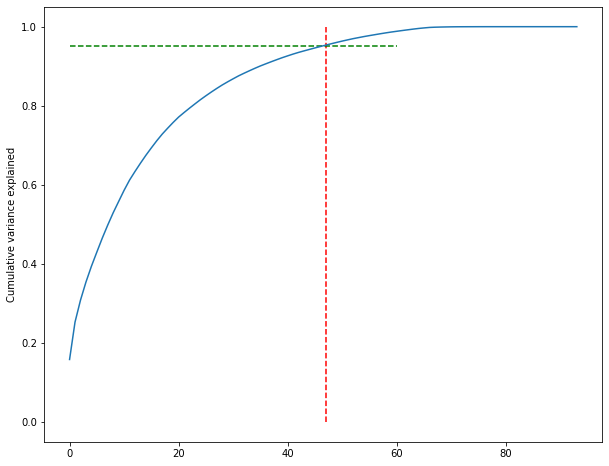

In [57]:
fig = plt.figure(figsize=[10,8])
plt.vlines(x=47, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [58]:
pca_final = IncrementalPCA(n_components=47)
df_train_pca = pca_final.fit_transform(X_train_scaled)
df_train_pca.shape

(88013, 47)

In [59]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(47, 47)

<AxesSubplot:>

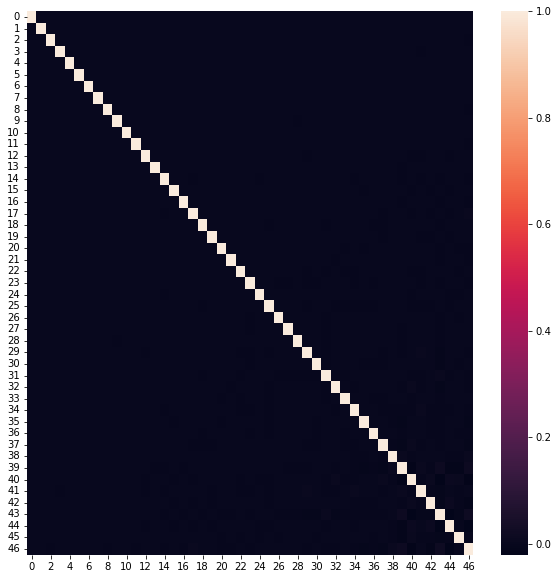

In [60]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=False)

In [61]:
X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test_scaled)

df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(37721, 47)

## Apply Logistic Regression on PCA Data

In [62]:
logistic_pca = LogisticRegression()
model_pca = logistic_pca.fit(df_train_pca, y_train)

In [63]:
df_train_pca.shape

(88013, 47)

In [64]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [65]:
pred_probs_train.shape

(88013, 2)

In [66]:
ID_X_train.shape

(88013,)

In [67]:
pred_probs_train[:,1].shape

(88013,)

In [68]:
df_train_probs = pd.DataFrame(pred_probs_train[:,1], columns = ['churn_probability'])
train_result = pd.concat([ID_X_train.reset_index(drop=True), df_train_probs.reset_index(drop=True)], axis=1)
train_result.head()

,id,churn_probability
0,27643,0.801744
1,27379,0.764922
2,65222,0.242953
3,63390,0.696446
4,60548,0.658652


In [69]:
train_result.shape

(88013, 2)

In [70]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_result[i]= train_result['churn_probability'].map(lambda x: 1 if x > i else 0)
train_result.head()

,id,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,27643,0.801744,1,1,1,1,1,1,1,1,1,0
1,27379,0.764922,1,1,1,1,1,1,1,1,0,0
2,65222,0.242953,1,1,1,0,0,0,0,0,0,0
3,63390,0.696446,1,1,1,1,1,1,1,0,0,0
4,60548,0.658652,1,1,1,1,1,1,1,0,0,0


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, train_result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500801  1.000000  0.000000
0.1   0.1  0.646439  0.976949  0.314867
0.2   0.2  0.697624  0.957597  0.436817
0.3   0.3  0.740004  0.935817  0.543563
0.4   0.4  0.775215  0.908683  0.641319
0.5   0.5  0.797973  0.860403  0.735342
0.6   0.6  0.807017  0.787803  0.826293
0.7   0.7  0.767478  0.629172  0.906227
0.8   0.8  0.629157  0.298047  0.961330
0.9   0.9  0.536614  0.086258  0.988415


<Figure size 1080x720 with 0 Axes>

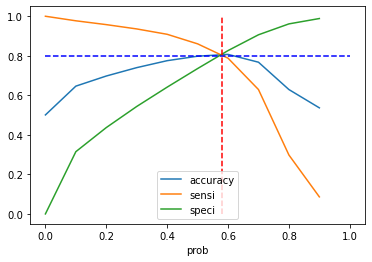

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
fig = plt.figure(figsize=[15,10])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.58, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.80, xmax=1, xmin=0, colors="b", linestyles="--")
plt.show()

#### As per above graph, ideal threashold probability is 0.58

In [73]:
pred_probs_train = model_pca.predict_proba(df_train_pca)
"{:2.4}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.8698'

In [74]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.4}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.8734'

## Logsitic Regression on Final test.csv

In [75]:
test_csv = pd.read_csv("test.csv")

In [76]:
test_csv.shape

(30000, 171)

In [77]:
test_csv.drop(missing_col_list, axis=1, inplace=True)
test_csv.drop(unique_col_list, axis=1, inplace=True)
test_csv.shape

(30000, 95)

In [78]:
test_csv = fill_missing_values(test_csv)
ID_test = test_csv.pop('id')
test_csv.shape

(30000, 94)

In [79]:
test_csv_pca = pca_final.transform(test_csv)
test_csv_pca.shape

(30000, 47)

In [80]:
pred_probs_test = model_pca.predict_proba(test_csv_pca)

In [81]:
pred_probs_test.shape

(30000, 2)

In [82]:
pred_probs_test

array([[1.00000000e+000, 1.91281281e-305],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 1.25716134e-151],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [83]:
df_test_final = pd.DataFrame(pred_probs_test[:,1], columns = ['Churn probability'])
df_test_final.head()

,Churn probability
0,1.912813e-305
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00


In [84]:
ID_test.head()

0    69999
1    70000
2    70001
3    70002
4    70003
Name: id, dtype: int64

In [85]:
result = pd.concat([ID_test.reset_index(drop=True), df_test_final.reset_index(drop=True)], axis=1)
result = result.rename(columns={'id': 'Id', 'Churn probability':'churn_probability'})
result['churn_probability'] = result['churn_probability'].map(lambda x: 1 if x > 0.5 else 0)
result.head()

,Id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [86]:
result.to_csv("solution_pca_log.csv", index=False)

## Apply RandomForest
* No PCA
* Apply Grid-search to find best hyper-paramters

In [87]:
number_of_jobs = -3
rf = RandomForestClassifier(random_state=42, n_jobs=number_of_jobs)

In [88]:
params = {
    'max_depth': [3, 4, 5, 7, 9, 10, 12, 14, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40]
}

In [89]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=number_of_jobs, verbose=1, scoring="accuracy")

In [90]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 560 candidates, totalling 2240 fits
Wall time: 28min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-3, random_state=42),
             n_jobs=-3,
             param_grid={'max_depth': [3, 4, 5, 7, 9, 10, 12, 14, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='accuracy', verbose=1)

In [91]:
grid_search.best_score_

0.9308284276904846

In [92]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=40,
                       n_jobs=-3, random_state=42)

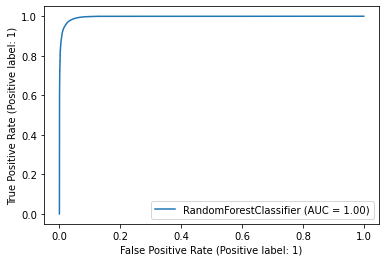

In [93]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [94]:
# Util method to evaluate model
def evaluate_model(dt_classifier):
    '''
    Util method to evaluate model
    input: model object
    output: print model metrics
    return: None
    '''
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [95]:
evaluate_model(rf_best)

Train Accuracy : 0.9717655346369286
Train Confusion Matrix:
[[42624  1312]
 [ 1173 42904]]
--------------------------------------------------
Test Accuracy : 0.9353410567058137
Test Confusion Matrix:
[[17770  1161]
 [ 1278 17512]]


In [96]:
X_train.shape

(88013, 94)

In [97]:
test_csv.shape

(30000, 94)

In [98]:
test_final_predict = rf_best.predict(test_csv)
test_final_predict.shape

(30000,)

In [99]:
df_test_final = pd.DataFrame(test_final_predict, columns = ['Churn probability'])
df_test_final.head()

,Churn probability
0,0
1,0
2,1
3,0
4,0


In [100]:
result = pd.concat([ID_test.reset_index(drop=True), df_test_final.reset_index(drop=True)], axis=1)
result = result.rename(columns={'id': 'Id', 'Churn probability':'churn_probability'})
result.head()

,Id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [101]:
result.to_csv("solution.csv", index=False)

## Apply Random Forest on PCA data
* This is to test, if PCA followed by Random forest, will out-perform simple Random Forest or not
* Apply grid-search to find best hyper-paramters

In [102]:
rf_pca = RandomForestClassifier(random_state=42, n_jobs=number_of_jobs)

In [103]:
grid_pca_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=number_of_jobs, verbose=1, scoring="accuracy")

In [104]:
%%time
grid_pca_rf.fit(df_train_pca, y_train)

Fitting 4 folds for each of 560 candidates, totalling 2240 fits
Wall time: 29min 32s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-3, random_state=42),
             n_jobs=-3,
             param_grid={'max_depth': [3, 4, 5, 7, 9, 10, 12, 14, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='accuracy', verbose=1)

In [105]:
grid_pca_rf.best_score_

0.886846296545819

In [106]:
rf_best_pca = grid_pca_rf.best_estimator_
rf_best_pca

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=40,
                       n_jobs=-3, random_state=42)

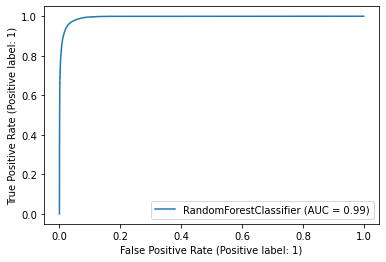

In [107]:
plot_roc_curve(rf_best_pca, df_train_pca, y_train)
plt.show()

In [108]:
# Util method to evaluate model with PCA data
def evaluate_model_pca(dt_classifier):
    '''
    Util method to evaluate model with PCA data
    input: model object
    output: print model metrics
    return: None
    '''
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [109]:
evaluate_model_pca(rf_best_pca)

Train Accuracy : 0.9650165316487337
Train Confusion Matrix:
[[41887  2049]
 [ 1030 43047]]
--------------------------------------------------
Test Accuracy : 0.8987036398822937
Test Confusion Matrix:
[[16749  2182]
 [ 1639 17151]]


#### Model (PCA + Random Tree) is less than normal Random Tree, so no need to save solution.csv file

### Apply XGBoost on non-PCA data

##### Wanted to run XGboost with GridSearch for hyper-parameter tuning, but its taking too much time to converge, so those readings and steps are not part of this notebook.

In [110]:
import xgboost as xgb

In [111]:
number_of_jobs = -3
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=number_of_jobs, verbosity=1, gpu_id=0)

In [112]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-3, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [113]:
evaluate_model(xgb_clf)

Train Accuracy : 0.9997273130105779
Train Confusion Matrix:
[[43912    24]
 [    0 44077]]
--------------------------------------------------
Test Accuracy : 0.9603138835131624
Test Confusion Matrix:
[[18150   781]
 [  716 18074]]


### Use XGBoost on test.csv

In [114]:
test_xgboost_predict = xgb_clf.predict(test_csv)
test_xgboost_predict.shape

(30000,)

In [115]:
df_test_final = pd.DataFrame(test_xgboost_predict, columns = ['churn_probability'])
df_test_final.head()

,churn_probability
0,0
1,0
2,1
3,0
4,0


In [116]:
result = pd.concat([ID_test.reset_index(drop=True), df_test_final.reset_index(drop=True)], axis=1)
result.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [117]:
result.to_csv("solution_xgboost.csv", index=False)

#### Wanted to run XGboost with GridSearch, but its taking too much time to converge, so those readings and steps are not part of this notebook.

## Summary

### Model summary

#### PCA + Linear Regression
* Accuracy on Train: 0.8698
* Accuracy on Test: 0.8734
* Accuracy on test.csv (As per Kaggle): 0.90056

#### Random Forest
* Accuracy on Train: 0.9718
* Accuracy on Test:  0.9353
* Accuracy on test.csv (As per Kaggle): 0.94256

#### PCA + Random Forest
* Accuracy on Train: 0.9650
* Accuracy on Test:  0.90

#### XgBoost
* Accuracy on Train: 0.9997
* Accuracy on Test:  0.9603
* Accuracy on Test.csv (As per Kaggle): 0.92486

#### Performance of Random Forest without PCA is better, so Ramdon Forest will be the choosen model.

#### Customer with following properties are most likely to not-chrun

* Customer calling between same network (onnet).
* Customer with more incoming calls in roaming.
* Customer with more special calls


#### Customer with following properties are most likely to chrun:
* Customer generating high revenue
* Customer spending more on Recharge amount.
* Customer with high number of incoming STD call.
* Customer making high number of calls to external network call.
* Customer with more number of outgoing call
* Customer using 2G compared to 3G